In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import datetime

In [136]:
%matplotlib inline

In [137]:
import pandas as pd
dadosGEE = pd.read_csv('C:/Users/barba/Documents/MeusObjetivos/MESTRADO/TNM5843GEE/CRDS/Data_1/Data_h.txt')

In [27]:
dadosGEE.set_index('DATE_TIME', inplace=True)
dadosGEE.head()

,CO,CO2_dry,CH4_dry,hour_of_day,day_of_week,weekday
DATE_TIME,,,,,,
2020-03-10 00:00:00,0.714345,488.685021,1.934361,0,Tue,weekday
2020-03-10 01:00:00,0.672191,481.780098,2.125870,1,Tue,weekday
2020-03-10 02:00:00,0.799080,453.478121,1.960951,2,Tue,weekday
2020-03-10 03:00:00,0.354610,429.511803,1.891184,3,Tue,weekday
2020-03-10 04:00:00,0.257082,421.557104,1.927399,4,Tue,weekday


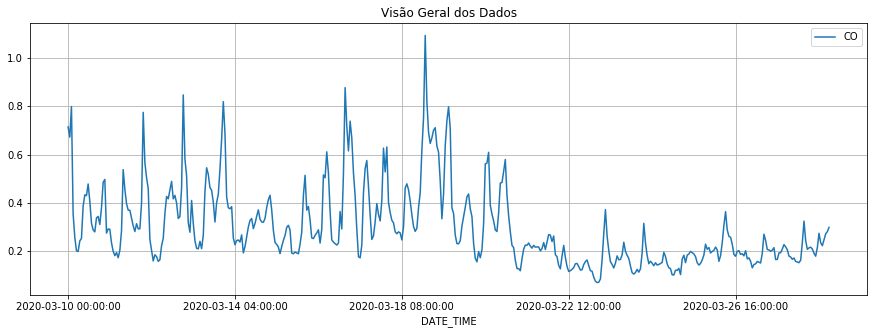

In [38]:
dadosGEE[['CO','day_of_week']].plot(figsize=(15, 5), title='Visão Geral dos Dados', grid=True)

In [43]:
dadosGEE.describe()

,CO,CO2_dry,CH4_dry,hour_of_day
count,457.000000,457.000000,457.000000,457.000000
mean,0.298010,422.597819,2.041293,11.474836
std,0.161063,12.746197,0.252917,6.943058
min,0.069806,405.373501,1.822581,0.000000
25%,0.184939,413.413925,1.911626,5.000000
50%,0.246305,419.397146,1.975609,11.000000
75%,0.370693,427.115881,2.078222,17.000000
max,1.093673,488.685021,4.102668,23.000000


In [44]:
dadosGEE['day_of_week'].value_counts()

Thu    72
Sat    72
Fri    72
Wed    72
Tue    72
Sun    49
Mon    48
Name: day_of_week, dtype: int64

In [76]:
colunasSelecionadas=['DATE_TIME','hour_of_day','day_of_week','CO']

In [77]:
dadosGEEmediasdiarias=dadosGEE.filter(items=colunasSelecionadas)

In [78]:
dadosGEEmediasdiarias.head()

,hour_of_day,day_of_week,CO
DATE_TIME,,,
2020-03-10 00:00:00,0,Tue,0.714345
2020-03-10 01:00:00,1,Tue,0.672191
2020-03-10 02:00:00,2,Tue,0.799080
2020-03-10 03:00:00,3,Tue,0.354610
2020-03-10 04:00:00,4,Tue,0.257082


In [82]:
dadosGEEmediasdiarias[['hour_of_day','day_of_week','CO']].groupby(['day_of_week']).mean()

,hour_of_day,CO
day_of_week,,
Fri,11.500000,0.322060
Mon,11.500000,0.270244
Sat,11.500000,0.241655
Sun,11.265306,0.226159
Thu,11.500000,0.359328
Tue,11.500000,0.325596
Wed,11.500000,0.308823


In [96]:
dadosGEEmediasdiarias.dtypes

DATE_TIME       object
hour_of_day      int64
day_of_week     object
CO             float64
dtype: object

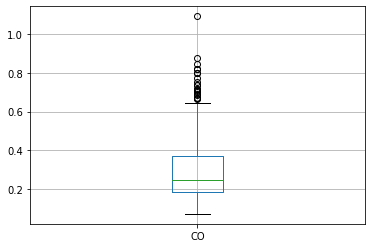

In [81]:
import matplotlib.pyplot as plt
dadosGEEmediasdiarias.boxplot(column='CO')
plt.show()

In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import seaborn as sns
import datetime

In [141]:
%matplotlib inline

In [142]:
np.random.seed(281022020)

In [ ]:
# dadosGEE['DATE_TIME']=pd.to_datetime(dadosGEE['DATE_TIME'])

In [99]:
dadosGEE.dtypes

level_0                 int64
index                   int64
DATE_TIME      datetime64[ns]
CO                    float64
CO2_dry               float64
CH4_dry               float64
hour_of_day             int64
day_of_week            object
weekday                object
dtype: object

In [103]:
dadosGEE['DATE_TIME'].dt.day.value_counts()

19    24
28    24
11    24
12    24
13    24
14    24
15    24
16    24
17    24
18    24
10    24
20    24
21    24
22    24
23    24
24    24
25    24
26    24
27    24
29     1
Name: DATE_TIME, dtype: int64

In [107]:
dadosGEE['DATE_TIME'].dt.day.mean()

19.0218818380744

In [116]:
%matplotlib inline

In [123]:
dadosGEE.set_index('DATE_TIME').groupby(pd.Grouper(freq='D')).mean()


,level_0,index,CO,CO2_dry,CH4_dry,hour_of_day
DATE_TIME,,,,,,
2020-03-10,11.5,11.5,0.389140,438.263644,1.995677,11.5
2020-03-11,35.5,35.5,0.343577,432.143782,1.986585,11.5
2020-03-12,59.5,59.5,0.362528,432.471513,1.984456,11.5
2020-03-13,83.5,83.5,0.409260,432.494482,2.034362,11.5
2020-03-14,107.5,107.5,0.302386,421.106715,2.052426,11.5
2020-03-15,131.5,131.5,0.282156,418.237930,2.010621,11.5
2020-03-16,155.5,155.5,0.376520,426.153811,2.146822,11.5
2020-03-17,179.5,179.5,0.430197,427.334687,2.282416,11.5
2020-03-18,203.5,203.5,0.424947,426.106398,2.121871,11.5


In [134]:
dadosGEE.set_index('DATE_TIME').groupby(pd.Grouper(freq='D')).sum()

,level_0,index,CO,CO2_dry,CH4_dry,hour_of_day
DATE_TIME,,,,,,
2020-03-10,276,276,9.339369,10518.327465,47.896248,276
2020-03-11,852,852,8.245842,10371.450767,47.678051,276
2020-03-12,1428,1428,8.700683,10379.316316,47.626935,276
2020-03-13,2004,2004,9.822229,10379.867566,48.824681,276
2020-03-14,2580,2580,7.257262,10106.561158,49.258215,276
2020-03-15,3156,3156,6.771752,10037.710325,48.254894,276
2020-03-16,3732,3732,9.036485,10227.691461,51.523734,276
2020-03-17,4308,4308,10.324719,10256.032489,54.777991,276
2020-03-18,4884,4884,10.198718,10226.553561,50.924914,276


In [ ]:
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
date1 = datetime.date(1952, 1, 1)
date2 = datetime.date(2004, 4, 12)
delta = datetime.timedelta(days=100)

dates = drange(date1, date2, delta)
s = np.random.rand(len(dates))